<a href="https://colab.research.google.com/github/juanestebanperezm/Keras_introduction-/blob/main/keras_engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


input=keras.Input(shape=(784,))

dense=keras.layers.Dense(64,activation="relu")
x=dense(input)
x=keras.layers.Dense(64,activation='relu')(x)
out=keras.layers.Dense(10)(x)

model=keras.Model(inputs=input,outputs=out,name="mnist_model")

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


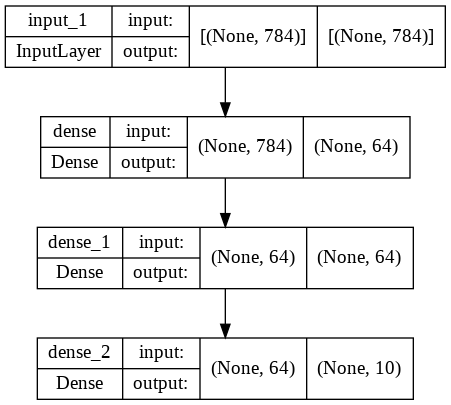

In [2]:
keras.utils.plot_model(model,"modelo_funcional.png",show_shapes=1)

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

x_train=x_train.reshape(60000,784).astype('float32')/255
x_test=x_test.reshape(10000,784).astype('float32')/255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history=model.fit(x_train,y_train,batch_size=64,epochs=2,validation_split=0.2)

test_scores=model.evaluate(x_test,y_test,verbose=2)

print('Perdida: {}'.format(test_scores[0]))
print('Precision: {}'.format(test_scores[1]))

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3458 - accuracy: 0.9012 - val_loss: 0.1991 - val_accuracy: 0.9409
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1649 - accuracy: 0.9516 - val_loss: 0.1386 - val_accuracy: 0.9613
313/313 - 0s - loss: 0.1391 - accuracy: 0.9596 - 344ms/epoch - 1ms/step
Perdida: 0.1390557438135147
Precision: 0.9595999717712402


In [4]:
model.save('/content/')

INFO:tensorflow:Assets written to: /content/assets


In [5]:
#Modelos secuenciales usando multiples capas neuronales

#Inicio de la DNN
encoder_input=keras.Input(shape=(28,28,1),name="img")

#Capas Neuronales
x=keras.layers.Conv2D(16,3,activation="relu")(encoder_input)
x=keras.layers.Conv2D(32,3,activation='relu')(x)
x=keras.layers.MaxPooling2D(3)(x)
x=keras.layers.Conv2D(32,3,activation='relu')(x)
x=keras.layers.Conv2D(16,3,activation='relu')(x)

#Final de la DNN
enconder_output=keras.layers.GlobalMaxPooling2D()(x)

encoder=keras.Model(encoder_input,enconder_output,name='encoder')

#Modelo de autoencoder

x=keras.layers.Reshape((4,4,1))(enconder_output)
x=keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
x=keras.layers.Conv2DTranspose(32,3,activation='relu')(x)
x=keras.layers.UpSampling2D(3)(x)
x=keras.layers.Conv2DTranspose(16,3,activation='relu')(x)
decoder_output = keras.layers.Conv2DTranspose(1, 3, activation="relu")(x)

auto_encoder=keras.Model(encoder_input,decoder_output,name='autoencoder')
auto_encoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                       

<h1>Modelo neuronal secuencial </h1>


In [6]:
modelo=keras.Sequential(
    [
     keras.Input(shape=(255,)),
     keras.layers.Dense(2,activation='relu',name='capa1'),
     keras.layers.Dense(3,activation='relu',name='capa2'),
     keras.layers.Dense(4,name='capa3')
    ]
)



